#                                  Avacado Project

# Importing neccessary libraries

In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

### Reading dataset 

In [2]:
avocado = pd.read_csv('avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [3]:
avocado.shape

(18249, 14)

In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
avocado.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### From the information of the dataset i observed that 'date' is represented as object type.we need to change the dtype. Let us do feature engineering for visualization purpose

In [8]:
#Predicting the data,Month and Day from givien Date using to_datetime
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
avocado['Day']=avocado['Date'].apply(lambda x:x.day)

In [9]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Graphical representation

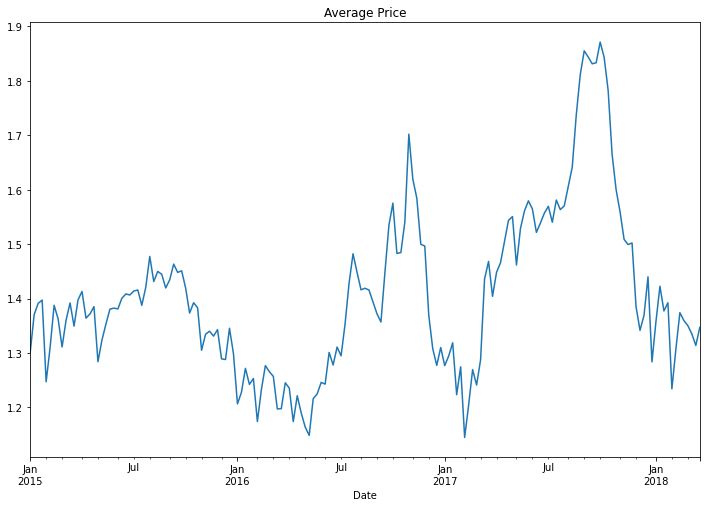

In [10]:
#visualize the AveragePrice with respect to groupby Date
bydate = avocado.groupby('Date').mean()
plt.figure(figsize=(12,8))
bydate['AveragePrice'].plot()
plt.title('Average Price')
plt.show()

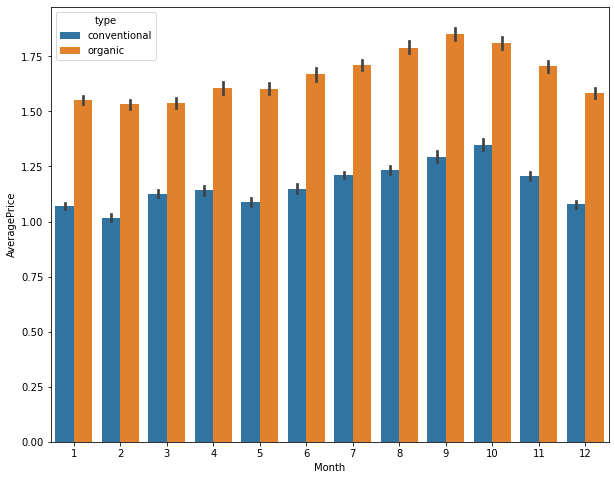

In [11]:
#visualizing the month and avg.price
plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='AveragePrice',hue='type',data=avocado)
plt.show()

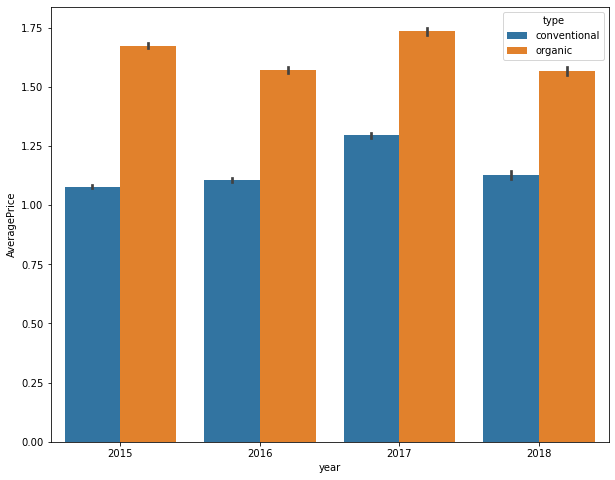

In [12]:
#visualizing the year and avg.price
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='AveragePrice',hue='type',data=avocado)
plt.show()

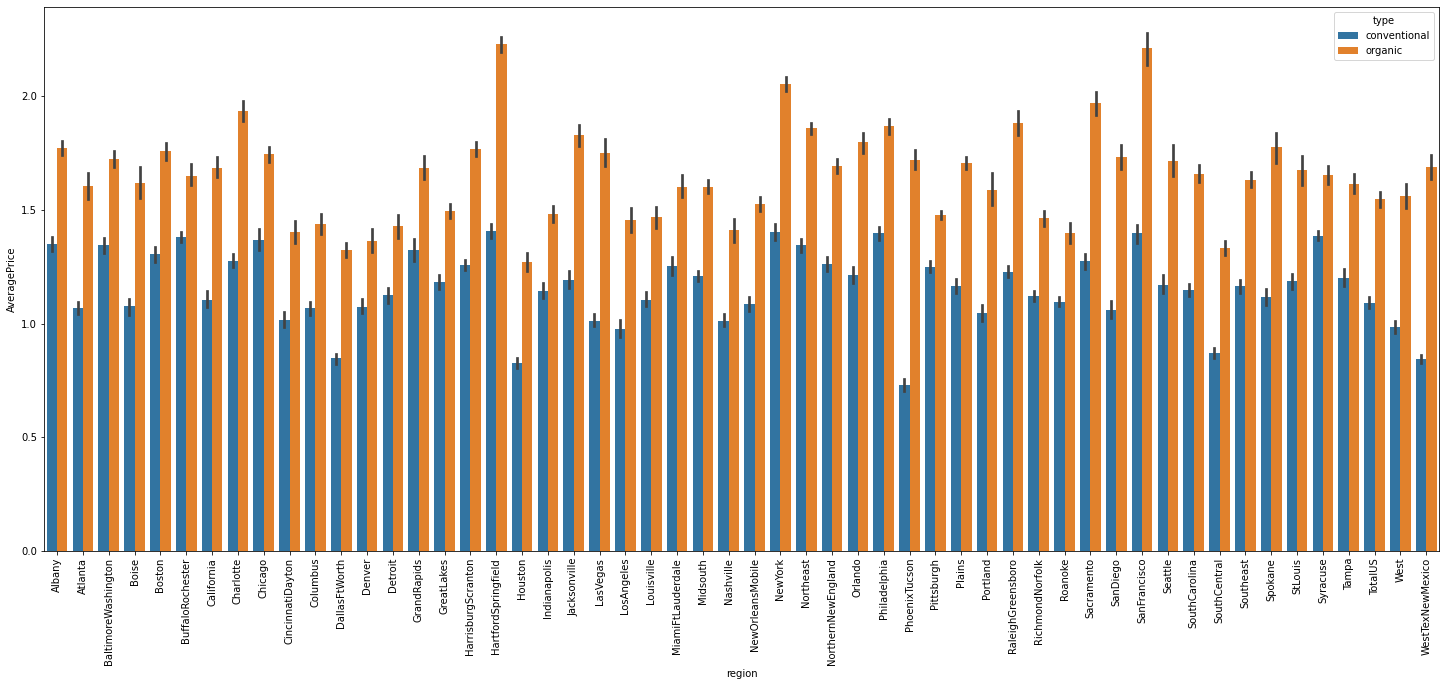

In [13]:
#visualizing the region and avg.price
plt.figure(figsize=(25,10))
sns.barplot(x='region',y='AveragePrice',hue='type',data=avocado)
plt.xticks(rotation=90)
plt.show()

#### From the figure i got an observation that is
####  . HartfordSpringfield
####  .SanFrancisco
####  . NewYork
####  . Philadelphia
####  .Sacramento
#### regions are having highest price

### CorrelationMatrix

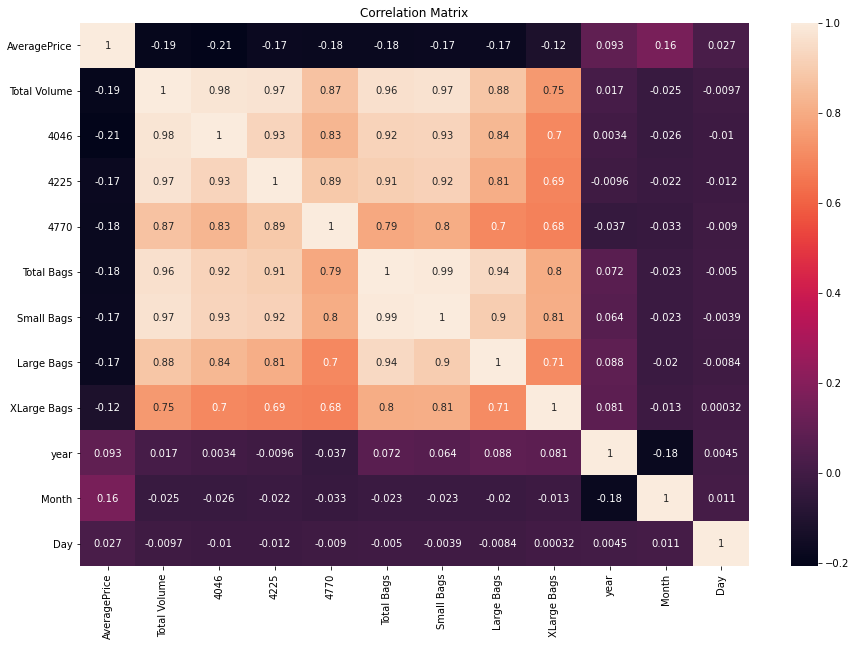

In [14]:
#chceking the relation between variables
corr = avocado.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

#### So,From heat map i observed that no variable is related with AveragePrice.But all the variables are inter related with each other.It may not help to get good result for my prediction.Let us look at another angel.Let us convert the catagorical data in to numerical form

In [15]:
#convert the catagorical datat into numeric
print(avocado['region'].unique())
avocado['region'].nunique()

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


54

In [16]:
print(avocado['type'].unique())
avocado['type'].nunique()

['conventional' 'organic']


2

In [17]:
avocado_f=pd.get_dummies(avocado.drop(['region','Date'],axis=1),drop_first=True)

In [18]:
avocado_f.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [19]:
avocado_f.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


### visualizing the data distribution among the variables.checking for  skewness and outliers

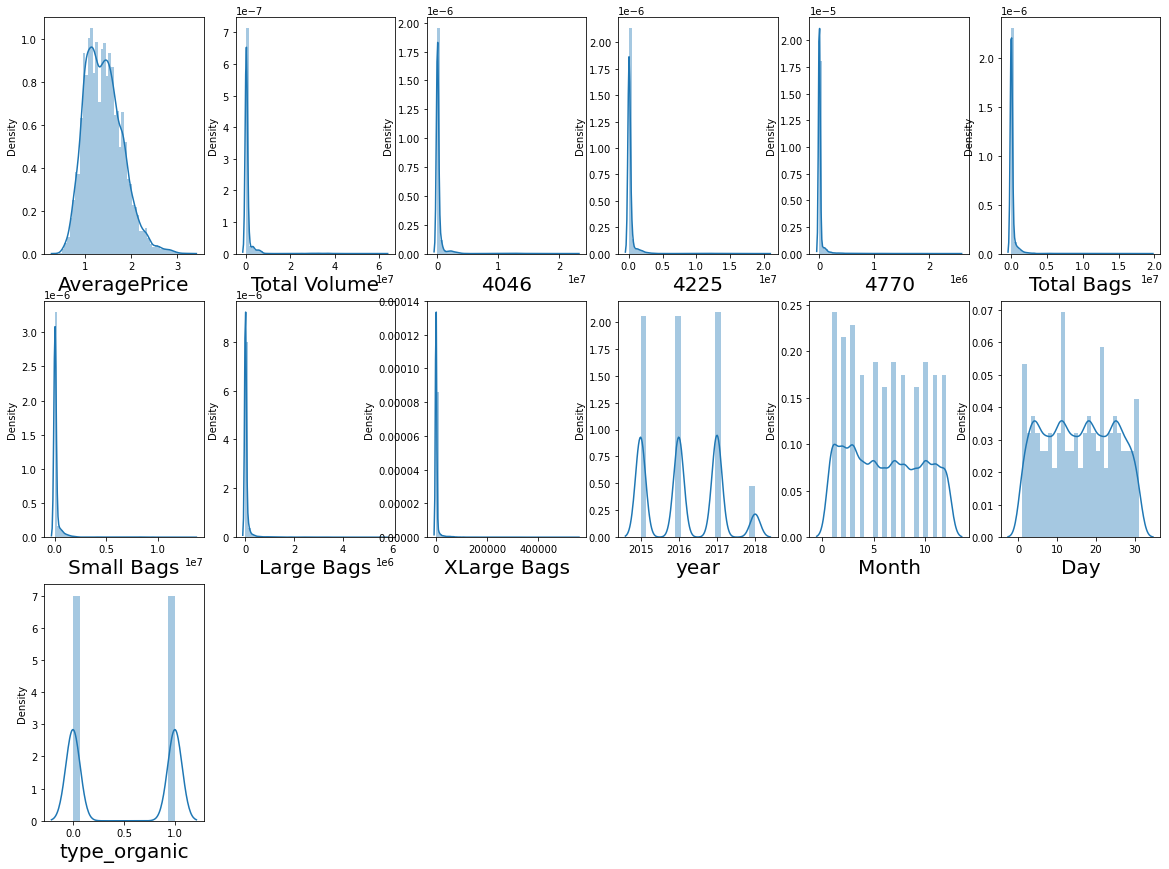

In [20]:
#visualizing data distribution
plt.figure(figsize=(20,20))
plotnumber= 1

for column in avocado_f:
    if plotnumber <=13:
        ax= plt.subplot(4,6,plotnumber)
        sns.distplot(avocado_f[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [21]:
#checking the skewness of the data
avocado_f.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
type_organic     0.000329
dtype: float64

In [22]:
#reducing the skewness by powertransformation
from sklearn.preprocessing import power_transform

avocado_n = power_transform(avocado_f)

avocado_f=pd.DataFrame(avocado_n,columns=avocado_f.columns)
avocado_f

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-1.221895,1.494347,1.229285,-0.999836
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-1.221895,1.494347,0.541005,-0.999836
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-1.221895,1.494347,-0.215570,-0.999836
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-1.221895,1.494347,-1.091311,-0.999836
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-1.221895,1.278438,1.416727,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.968548,-1.220706,-1.382073,1.000164
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.968548,-1.642047,1.323455,1.000164
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.968548,-1.642047,0.642842,1.000164
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.968548,-1.642047,-0.101959,1.000164


In [23]:
avocado_f.skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.213156
Month          -0.146584
Day            -0.208462
type_organic    0.000329
dtype: float64

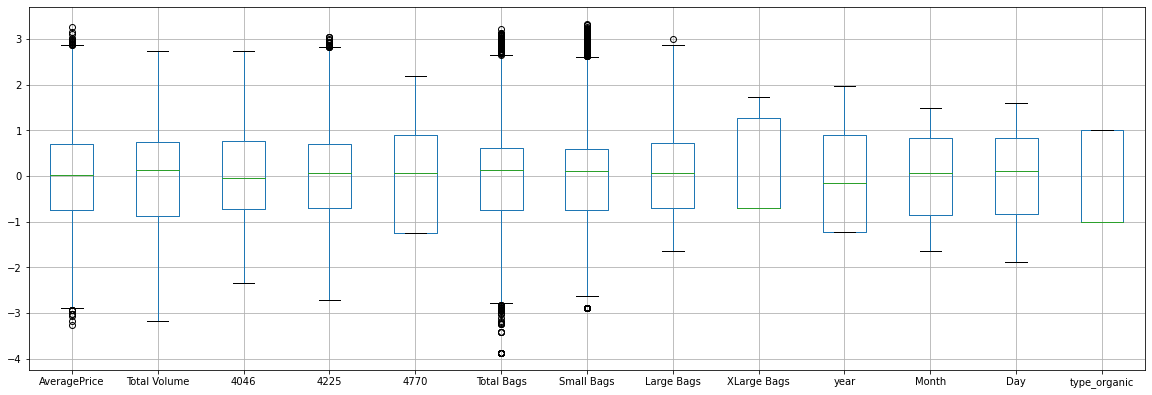

In [24]:
#check for outliers
avocado_f.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()



In [25]:
#removing outliers

from scipy.stats import zscore

z=np.abs(zscore(avocado_f))
z

array([[0.08624822, 0.08660524, 0.65861896, ..., 1.49434741, 1.22928497,
        0.99983562],
       [0.03402196, 0.15574567, 0.77686953, ..., 1.49434741, 0.54100493,
        0.99983562],
       [1.27393796, 0.17932662, 0.73194656, ..., 1.49434741, 0.21556953,
        0.99983562],
       ...,
       [1.14779044, 0.77150535, 0.61983119, ..., 1.64204669, 0.64284151,
        1.00016441],
       [1.2658763 , 0.69807719, 0.55028196, ..., 1.64204669, 0.10195902,
        1.00016441],
       [0.61828746, 0.66380937, 0.36790819, ..., 1.64204669, 0.95485351,
        1.00016441]])

In [26]:
threshould =3
np.where(z<3)
avocado_final = avocado_f[(z<3).all(axis=1)]
print(avocado_f.shape)
print(avocado_final.shape)
avocado_f = avocado_final
print("After removing outlier shape of the dataset is:",avocado_final.shape)

(18249, 13)
(18141, 13)
After removing outlier shape of the dataset is: (18141, 13)


In [27]:
#finally cleaned dataset for modelling 
avocado_f

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-1.221895,1.494347,1.229285,-0.999836
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-1.221895,1.494347,0.541005,-0.999836
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-1.221895,1.494347,-0.215570,-0.999836
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-1.221895,1.494347,-1.091311,-0.999836
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-1.221895,1.278438,1.416727,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.968548,-1.220706,-1.382073,1.000164
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.968548,-1.642047,1.323455,1.000164
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.968548,-1.642047,0.642842,1.000164
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.968548,-1.642047,-0.101959,1.000164


# Model selection and predictions 

#### Dividing the feature and target variable for implementing the model 

In [28]:
x = avocado_f.drop(columns=['AveragePrice'])
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-1.221895,1.494347,1.229285,-0.999836
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-1.221895,1.494347,0.541005,-0.999836
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-1.221895,1.494347,-0.215570,-0.999836
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-1.221895,1.494347,-1.091311,-0.999836
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-1.221895,1.278438,1.416727,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.968548,-1.220706,-1.382073,1.000164
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.968548,-1.642047,1.323455,1.000164
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.968548,-1.642047,0.642842,1.000164
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.968548,-1.642047,-0.101959,1.000164


In [29]:
y =avocado_f['AveragePrice']
y

0       -0.086248
1       -0.034022
2       -1.273938
3       -0.793421
4       -0.219440
           ...   
18244    0.640729
18245    0.816307
18246    1.147790
18247    1.265876
18248    0.618287
Name: AveragePrice, Length: 18141, dtype: float64

In [30]:
#traing the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [31]:
lr = LinearRegression()

train = []
test = []
    
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
        
    train.append(r2_score(y_train,pred_train))
    test.append(r2_score(y_test,pred_test))

data = pd.DataFrame({'Train':train,
                    'Test':test})
data

,Train,Test
0,0.573116,0.581767
1,0.575524,0.572029
2,0.582189,0.544358
3,0.576813,0.566693
4,0.574714,0.575406
...,...,...
95,0.575936,0.570323
96,0.576417,0.568212
97,0.578326,0.560037
98,0.578123,0.561981


In [32]:
#trained data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=14)
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)

pred_test=lr.predict(x_test)

print("R2_score:",r2_score(y_test,pred_test)*100)

from sklearn import metrics
print("\n")
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

R2_score: 58.47481290241308


MAE: 0.5043079171951699
MSE: 0.40443753913987684
RMSE: 0.6359540385435702


In [34]:
#crossvalidation for model
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,50):
    cv_score  = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv_score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the Test is {test_accuracy})")
    print("/n")

At cross fold 2 the cv_score is -2.7025928201602083 and accuracy score for training is 0.5724337687642396 and accuracy for the Test is 0.5847481290241308)
/n
At cross fold 3 the cv_score is 0.22729071156331052 and accuracy score for training is 0.5724337687642396 and accuracy for the Test is 0.5847481290241308)
/n
At cross fold 4 the cv_score is 0.1521458966871194 and accuracy score for training is 0.5724337687642396 and accuracy for the Test is 0.5847481290241308)
/n
At cross fold 5 the cv_score is 0.25529175676306615 and accuracy score for training is 0.5724337687642396 and accuracy for the Test is 0.5847481290241308)
/n
At cross fold 6 the cv_score is 0.13660251782628755 and accuracy score for training is 0.5724337687642396 and accuracy for the Test is 0.5847481290241308)
/n
At cross fold 7 the cv_score is 0.21110211866757161 and accuracy score for training is 0.5724337687642396 and accuracy for the Test is 0.5847481290241308)
/n
At cross fold 8 the cv_score is 0.1655484435715301 an

#### since the no.of folds shows that cv score for train and test data is same.so im taking cv= 15

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_test_dec = dt.predict(x_test)

dt = r2_score(y_test,pred_test_dec)
print('R2score',dt*100)

print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, pred_test_dec))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_dec))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_dec)))

R2score 77.80754190878616


MAE: 0.31786811052965847
MSE: 0.21614503787261558
RMSE: 0.46491401126726173


In [36]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_test_rf = rfr.predict(x_test)

rfr = r2_score(y_test,pred_test_rf)
print('R2score',rfr*100)

print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, pred_test_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rf)))

R2score 88.66815164667452


MAE: 0.2379545862320414
MSE: 0.1103673500893521
RMSE: 0.33221581854173066


#### RandomForestRegressor give us the best result.Why because,when we compared the result of 'RMSE' is lowest than the remaining models.So,I'm considering it as the best model for our prediction 

Text(0, 0.5, 'Predicted Y')

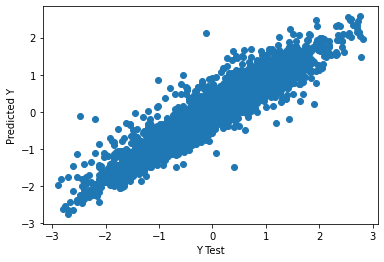

In [37]:
#plotting the resultant 
plt.scatter(x=y_test,y=pred_test_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Classification 

In [38]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [39]:
avocado.drop(columns=['Date'],axis = 1,inplace=True)
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [40]:
#convert the catagorical datat into numeric
print(avocado['region'].unique())
avocado['region'].nunique()

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


54

In [41]:
print(avocado['type'].unique())
avocado['type'].nunique()

['conventional' 'organic']


2

In [42]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
avocado['region']= LE.fit_transform(avocado['region'])
avocado['type'] = LE.fit_transform(avocado['type'])
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [43]:
xc = avocado.drop(columns=['region'])
xc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14


In [44]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
xc_scaled = scalar.fit_transform(xc)


In [45]:
yc = avocado['region']
yc

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [46]:
print(xc.shape)
print(yc.shape)

(18249, 13)
(18249,)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

maxAccu =0
maxRs =0
for i in range(1,100):
    xc_train,xc_test,yc_train,yc_test =train_test_split(xc_scaled,yc,test_size =.20,random_state=i)
    LR = LogisticRegression()  
    LR.fit(xc_train,yc_train)
    predrs=LR.predict(xc_test)
    acc = accuracy_score(yc_test,predrs)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)



Best accuracy is: 0.34821917808219177 On Random state: 61


In [48]:
#train_test_split
xc_train,xc_test,yc_train,yc_test =train_test_split(xc_scaled,yc,test_size =.20,random_state=64)

In [49]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xc_train,yc_train)
dt.score(xc_test,yc_test)

pred_df=dt.predict(xc_test)
print("Accuracy",accuracy_score(yc_test,pred_df)*100)
print('\n',confusion_matrix(yc_test,pred_df))
print(classification_report(yc_test,pred_df))

Accuracy 79.72602739726027

 [[49  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  0  2 ...  0  0 41]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        67
           1       0.56      0.77      0.65        57
           2       0.86      0.96      0.90        68
           3       0.77      0.75      0.76        64
           4       0.85      0.85      0.85        75
           5       0.66      0.61      0.64        67
           6       0.89      0.99      0.93        72
           7       0.87      0.84      0.85        73
           8       0.94      0.96      0.95        84
           9       0.88      0.81      0.84        63
          10       0.78      0.70      0.74        64
          11       0.91      0.85      0.88        60
          12       0.84      0.75      0.79        76
          13       0.72      0.76      0.74        76
    

In [50]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,xc,yc,cv=100)
print("Cross validation score of DecisionRegression Model",crv.mean())

Cross validation score of DecisionRegression Model 0.778228547408875


In [51]:
#Tunning the parameter using GridSearchCV

from sklearn.ensemble import RandomForestClassifier

xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,train_size=.20,random_state=64)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(xc_train,yc_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(xc_train,yc_train)

y_pred = clf.predict(xc_test)

rf_conf_mat = confusion_matrix(yc_test,y_pred)

print("\n Confusion_mat:",'\n',rf_conf_mat)
print("\n Accuracy RandomForest Normal===>",accuracy_score(yc_test,y_pred))
print('\n')
report =classification_report(yc_test,y_pred)
print(report)



best_params= > {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

 Confusion_mat: 
 [[219   0   0 ...   0   0   0]
 [  0 137   0 ...   0   0   3]
 [  0   0 249 ...   0   0   0]
 ...
 [  0   0   0 ... 273   1   0]
 [  0   0   0 ...   1 250   0]
 [  0   0  10 ...   0   0 165]]

 Accuracy RandomForest Normal===> 0.7617123287671232


              precision    recall  f1-score   support

           0       0.75      0.79      0.77       276
           1       0.68      0.51      0.58       270
           2       0.87      0.95      0.91       261
           3       0.75      0.69      0.72       259
           4       0.81      0.80      0.81       270
           5       0.76      0.63      0.69       267
           6       0.90      0.95      0.93       262
           7       0.65      0.88      0.74       265
           8       0.92      0.92      0.92       265
           9       0.77      0.78      0.78       267
          10 

In [52]:
#CV for RandomForestClassifier
crv = cross_val_score(clf,xc,yc,cv=100)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.8556125022518465


In [53]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parameters = {'n_neighbors':range(1,30)}
gridsearch= GridSearchCV(knn,parameters)
gridsearch.fit(xc_train,yc_train)
gridsearch.best_params_


{'n_neighbors': 1}

In [54]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(xc_train,yc_train)
pred = knn.predict(xc_test)
conf_mat = confusion_matrix(yc_test,pred)

print("\n Confusion_mat:",'\n',conf_mat)
print("\n Accuracy RandomForest Normal===>",accuracy_score(yc_test,y_pred))
print('\n')
report =classification_report(yc_test,pred)
print(report)


 Confusion_mat: 
 [[141   0   0 ...   0   0   0]
 [  0 135   5 ...   0   0   4]
 [  0   2 192 ...   1   0   4]
 ...
 [  0   0   0 ... 257   0   0]
 [  0   0   0 ...   0 212   0]
 [  0  14   4 ...   0   0 121]]

 Accuracy RandomForest Normal===> 0.7617123287671232


              precision    recall  f1-score   support

           0       0.58      0.51      0.54       276
           1       0.54      0.50      0.52       270
           2       0.67      0.74      0.70       261
           3       0.63      0.61      0.62       259
           4       0.67      0.67      0.67       270
           5       0.49      0.52      0.51       267
           6       0.70      0.78      0.74       262
           7       0.62      0.70      0.66       265
           8       0.82      0.80      0.81       265
           9       0.57      0.58      0.57       267
          10       0.42      0.52      0.46       266
          11       0.54      0.58      0.56       267
          12       0.63      0

In [55]:
#crossvalidation for KNN

crv = cross_val_score(knn,xc,yc,cv=100)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.6519062631357713


#### In prediction the accuracy score of
#### Decision Tree accuracy_score :78% and CV score also: 78%,
#### RandomForest accuracy score :75% and CV score:81%
#### KNC accuracy score:75% and CV score: 65%  

In [56]:
#saving the model
import joblib
joblib.dump(dt,"avocado.pkl")

['avocado.pkl']